# Discussion Activity: Lyft Calculator

## Group Names and Roles

- Partner 1 (Role)
- Partner 2 (Role)
- Partner 3 (Role)

In this activity, we will use functions to write code that might be used in a ridesharing app such as Uber or Lyft. 

## Part A: Review of Functions

Write a function called square which inputs an list and returns a list with each item squared. (Don't worry about error handling for now.)

In [4]:
#Your code here
def square(l):
    return [i*i for i in l]

In [5]:
#Run this cell to test your function. Expected output: [1, 4, 9]
L=[1,2,3]
square(L)

[1, 4, 9]

Let's make our `square` function more flexible. Write a function called `compute_power()` that accepts a list `L` of numbers and a power `a` and raises each element of `L` to the `a`-th power. Give `a` a default value of 2. You only need to add comments if your solution is longer than two lines.

In [9]:
def compute_power(L,a=2):
    return [i**a for i in L]

In [10]:
#run this code to test your solution. It should return True.
compute_power(L)==square(L)

True

## Part B: Computing distances with functions

<img src="https://i.imgur.com/FrMebl0.png" width=300px>
<div style="text-align: center">  </div>
<br>


For the next part of this assignment, we're going to think about how we might be able to write functions that can be used to compute distances on a map.

### Part B.1: Computing the Euclidean distance

"Euclidean distance" is simply the distance of the straight line that connects two points in Euclidean space. It's basically the distance "as the crow flies". On a map, it might look something like this:

<img src="https://i.imgur.com/KSmguA5.png" width=500px>
<div style="text-align: center"> </div>

Write a function called Euclidean_distance which inputs two points `p` and `q` (as either lists or tuples) and returns the Euclidean distance. Please write a docstring for this function.

For example: 

```python
Euclidean_distance([2, 1], [5, 5])
```
```
5.0
```


**Hint:** $d((x_1,y_1),(x_2,y_2))=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$

In [13]:
#Your Code Here
def Euclidean_distance(p,q):
    return ((p[0]-q[0])**2 + (p[1]-q[1])**2)**.5

Run the following code to test your function

In [14]:
Euclidean_distance([2, 1], [5, 5])

5.0

### Part B.2: Computing the "Lyft" distance

For this part of the assignment, let's say that you've been thinking about starting a new rideshare company similar to Uber or Lyft. You've started thinking about how you should go about estimating the amount you should charge for a given ride. You've realized that computing the Euclidean distance between two points makes sense for "as the bird flies" distance computations, but not for vehicles which need to navigate city blocks. Now you need to create a new function that computes an estimate for the total distance of the ride for your new "Lyft-like" service.

When you're driving a car you can't just travel in a straight line between two points, you're forced to drive along the grid structure defined by where the streets are. Your path might look something like this:

<img src="https://i.imgur.com/ieJ1Z4k.png" width=500px>
<div style="text-align: center"> </div>
<br>

For the purposes of computing these new "Lyft"-like distances, you're going to assume that the drivers for your company are generally pretty good about taking the shortest possible route, and you're also going to assume that, most of the time, the streets will have a pretty standard grid-like structure. After all, it would be pretty hard to predict just how irregular the routes might end up being.

**Write a function for computing a "Lyft" distance** based on the restriction that the car must travel on a grid of roads that run parallel to the $x$ and $y$ axes of an $x$-$y$ plane. Your function should take a **starting point and a stopping point as input variables** and **return** the distance estimate. It should use the formula
\begin{equation*}
d((x_1,y_1),(x_2,y_2))=|x_1-x_2|+|y_1-y_2|
\end{equation*}

Your estimate will essentially tell you how many blocks the driver will travel to get to the destination. Make sure to write a docstring for your function. 

**Hint**: The python syntax for absolution value is `abs(x)`. Try to discover the mathematical formula on your own, but feel free to ask for help from your TA or LA if you get stuck.



In [15]:
#Your Code Here
def lyft_distance(p,q):
    return abs(p[0]-q[0]) + abs(p[1]-q[1])

Run the code below to test your function. The answer should be 17

In [16]:
distance=lyft_distance((4,5),(-2,-6))
print(distance)

17


### Creating a fare-computing function

Let's assume that you want to be able to quickly calculate an estimate for the cost of the trip so that you can let your riders know roughly how much you'll charge them.  

**Write another function** called `trip_cost` that **calls the function you just wrote** for computing the total distance of the ride to ***print* the cost of the trip** so that it reads "The cost of the trip will be $< amount >" where < amount > is the total in dollars that the trip will cost. Your function should take as arguments the starting point, the stopping point, and the fare (per mile), with a default value of 40 cents.  Please include an informative docstring. (For the purposes of this exercise, we will assume that each block is one mile so that we don't need to worry about unit conversions.)

***Hints:***

1.) To make the dollar value look nice, first callculate the cost, and the write ``cost="{:.2f}".format(cost)''.

2.) Your trip_cost function should call your lyft_distance function
    


In [27]:
def trip_cost(p,q,m=0.4):
    cost="{:.2f}".format(lyft_distance(p,q)*m)
    return "The cost of the trip will be $" + str(cost) + "."

In [28]:
#run this code to test your funciton, the cost should be $6.80

trip_cost((-2,-6),(4,5))

'The cost of the trip will be $6.80.'

---
## Part C: Combining your functions

Now that you've written two different functions for finding the distance, you're thinking that it would be more convenient if you could use the same function to compute both the Euclidean distance and the Lyft distance. It would also make it a lot easier to compare how much longer the Lyft distance is than the Euclidean distance.

**Write a function** that is capable of computing the Euclidean distance **or** the Lyft distance based on a keyword argument call `path_type`. 
* If the `path_type` is 'Lyft', compute the Lyft distance, otherwise compute the standard Euclidean distance. 
* Your function should call the lyft_distance and Euclidean_distance functions that you have written earlier.

As before, your function should **return** the distance. Make sure to write an appropriate docstring.


In [37]:
#Your code here
def compute_distance(p,q,path_type = "goober"):
    if path_type == "lyft":
        return lyft_distance(p,q)
    else:
        return Euclidean_distance(p,q)

Run this code to test your fuction. The answers should be 12.5296 and 17


In [38]:
print(compute_distance((4,5),(-2,-6)))
print(compute_distance((4,5),(-2,-6),path_type="lyft"))

12.529964086141668
17


## Part D: Planning your route

Now that you've worked out a system for estimating travel distances and ride fares, you're ready to start testing your new rideshare service. You fire up your fancy new program and immediately get three simultaneous rider requests, but luckily they all are looking for a ride to the same place -- the airport!

Let's assume that:

1. Your starting location is (-2,3).
2. The ride locations are (-1, -2), (3,3), and (2, -1).
3. The stopping location, the airport, is at (4,0).

Run the cell below to visualize the locations

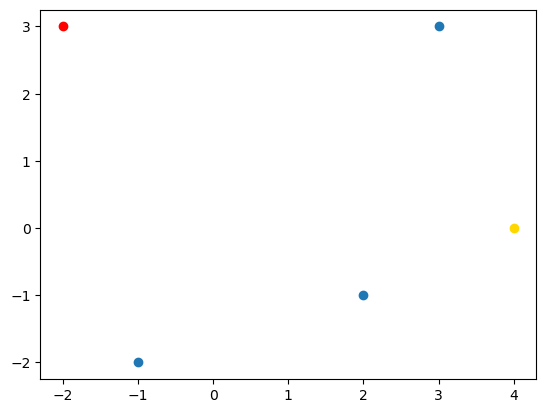

In [39]:
from matplotlib import pyplot as plt

start = (-2,3)
stops = [(-1,-2),(3,3),(2,-1)]
end=(4,0)

x_stops=[p[0] for p in stops]
y_stops=[p[1] for p in stops]
start_point = [start[0],start[1]]
stop_point = [end[0],end[1]]

plt.scatter(x_stops,y_stops)
plt.scatter(start_point[0],start_point[1],color="red")
plt.scatter(stop_point[0],stop_point[1],color="gold")


Let's first assume that we pick the riders up in order, i.e. that we go first from the start to (-1, -2), then from (-1,-2) to (3,3), then from (3,3) to (2, -1), and then lastly from (2,-1) to the airport.

Write a function called simple_route which inputs three variables, start, stops, and end, and then returns the total distance of the trip. Your solution should call the lyft_distance function several times.

In [40]:
#Your code here
def simple_route(p,q,e):
    total = 0
    for i in q:
        total += lyft_distance(p,i)
        p = i
    total += lyft_distance(p,e)
    return total

Run the code below to test your function. It should return 23

In [41]:
simple_route(start,stops,end)

23

Now, lets  figure out the best order to pick the riders up. Run the code below to get a list of all the possible permutations of 0,1, and 2. (By permuatations, we mean all the different possible ordering of 0, 1, and 2.)

In [19]:
#run the code below to get a list of all the possible permutations of 0,1, and 2
from itertools import permutations
perms =permutations(range(3))
perms=list(perms)
perms

**Now for the most challenging part**: You need to create a function that takes in a starting position, a list of three rider locations, and a stopping location and determines the order of rider pickups that will require the least amount of driving. You want to make the default stopping location be the airport, since you figure this is where people will be headed most often. You should be able to use your function for computing the Lyft distance to help solve this problem.

Once you've come up with a plan, try **writing the function**. The function should **return the total distance of the trip and the list of rider locations in the appropriate pick-up order**.



Your function should have three input parameters start, stops, and end. It should return the best_distance and the best_perm as a tuple. It is recommeded that your best route function call the simple_route function that you wrote earlier, although this is not required. 

In [17]:
#Your code here

Run the code below to test your funciton. The anwer should be (19, (0, 2, 1))


In [20]:
best_distance, best_perm= best_route(start,stops,end)
best_distance, best_perm

Now run the code below to visualize your best route. (It is okay if you don't understand the code yet.)

In [21]:
plt.scatter(x_stops,y_stops)
plt.scatter(start_point[0],start_point[1],color="red")
plt.scatter(stop_point[0],stop_point[1],color="gold")

def plot_line(p,q):
    plt.plot([p[0],q[0]],[p[1],q[1]],color="black")
    
plot_line(start,stops[best_perm[0]])
plot_line(stops[best_perm[0]],stops[best_perm[1]])
plot_line(stops[best_perm[1]],stops[best_perm[2]])
plot_line(stops[best_perm[2]],end)
